In [1]:
import numpy as np
import pandas as pd
import pdb
from collections import defaultdict
from mmdata import MOSI
import argparse
from collections import defaultdict
from mmdata.dataset import Dataset
seed = 5
np.random.seed(seed)
import os

def pad(data, max_len):
    """A funtion for padding/truncating sequence data to a given lenght"""
    # recall that data at each time step is a tuple (start_time, end_time, feature_vector), we only take the vector
    data = np.array([feature[2] for feature in data])
    n_rows = data.shape[0]
    dim = data.shape[1]
    if max_len >= n_rows:
        diff = max_len - n_rows
        padding = np.zeros((diff, dim))
        padded = np.concatenate((padding, data))
        return padded
    else:
        return data[-max_len:]

In [2]:
max_len = 20
mosi = MOSI()
embeddings = mosi.embeddings()
facet = mosi.facet()
covarep = mosi.covarep()
sentiments = mosi.sentiments() # sentiment labels, real-valued. for this tutorial we'll binarize them
train_ids = mosi.train()
valid_ids = mosi.valid()

# sort through all the video ID, segment ID pairs
train_set_ids = []
for vid in train_ids:
    for sid in embeddings['embeddings'][vid].keys():
        if embeddings['embeddings'][vid][sid] and facet['facet'][vid][sid] and covarep['covarep'][vid][sid]:
            train_set_ids.append((vid, sid))

valid_set_ids = []
for vid in valid_ids:
    for sid in embeddings['embeddings'][vid].keys():
        if embeddings['embeddings'][vid][sid] and facet['facet'][vid][sid] and covarep['covarep'][vid][sid]:
            valid_set_ids.append((vid, sid))

In [15]:
def get_ft(data):
    return np.array([feature[2] for feature in data])
train_set_audio = [get_ft(covarep['covarep'][vid][sid]) for (vid, sid) in train_set_ids if covarep['covarep'][vid][sid]]

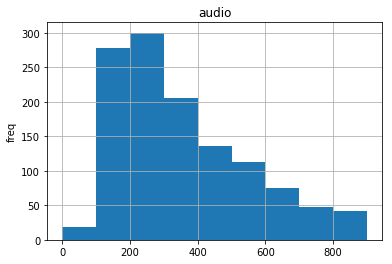

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
lens = list(map(lambda x: len(x), train_set_audio))
s = pd.Series(lens)
s.hist(bins=np.arange(0,1000,100))
plt.title("audio")
plt.ylabel("freq")
plt.show()

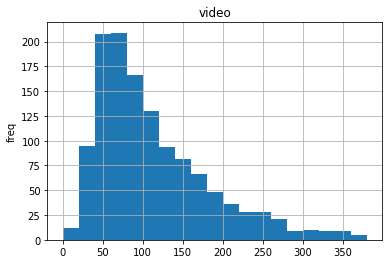

In [47]:

train_set_visual = [get_ft(facet['facet'][vid][sid]) for (vid, sid) in train_set_ids if facet['facet'][vid][sid]]
lens = list(map(lambda x: len(x), train_set_visual))
s = pd.Series(lens)
s.hist(bins=np.arange(0,400,20))
plt.title("video")
plt.ylabel("freq")
plt.show()

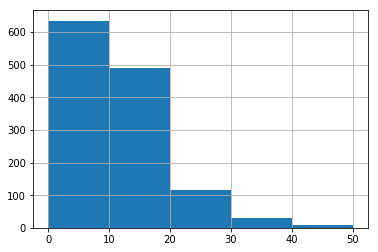

In [42]:

train_set_text = [get_ft(embeddings['embeddings'][vid][sid]) for (vid, sid) in train_set_ids if embeddings['embeddings'][vid][sid]]
lens = list(map(lambda x: len(x), train_set_text))
s = pd.Series(lens)
s.hist(bins=np.arange(0,60,10))
plt.show()


In [36]:
sorted(lens)[::-1]

[3860,
 2186,
 2082,
 1919,
 1845,
 1664,
 1638,
 1633,
 1527,
 1399,
 1390,
 1385,
 1352,
 1350,
 1332,
 1325,
 1308,
 1267,
 1227,
 1225,
 1218,
 1208,
 1206,
 1197,
 1183,
 1183,
 1164,
 1162,
 1148,
 1148,
 1134,
 1120,
 1109,
 1102,
 1099,
 1092,
 1090,
 1088,
 1083,
 1078,
 1060,
 1044,
 1044,
 1037,
 1037,
 1032,
 1025,
 1020,
 1020,
 1004,
 983,
 981,
 972,
 967,
 958,
 951,
 939,
 939,
 937,
 930,
 930,
 925,
 923,
 921,
 916,
 902,
 902,
 897,
 897,
 895,
 895,
 890,
 888,
 886,
 886,
 886,
 886,
 881,
 876,
 867,
 867,
 862,
 862,
 860,
 858,
 858,
 858,
 856,
 853,
 849,
 846,
 839,
 835,
 832,
 830,
 825,
 823,
 823,
 818,
 816,
 816,
 816,
 809,
 809,
 807,
 802,
 802,
 802,
 795,
 795,
 793,
 791,
 784,
 777,
 777,
 777,
 776,
 776,
 772,
 763,
 763,
 763,
 760,
 760,
 753,
 753,
 753,
 751,
 751,
 749,
 746,
 746,
 746,
 744,
 744,
 742,
 739,
 737,
 737,
 735,
 730,
 721,
 716,
 714,
 714,
 709,
 709,
 709,
 709,
 707,
 707,
 707,
 707,
 702,
 702,
 700,
 698,
 693,
 6